In [240]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las funciones de activación
# Función de activación (escalón)
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Función para hacer predicciones (output)
def perceptron_predict(X, weights):
    return step_function(np.dot(X, weights[1:]) + weights[0])

# Algoritmo de Perceptrón
def perceptron_train(X, y, learning_rate=0.1, epochs=10):
    # Inicializar los pesos (uno más por el bias)
    weights = np.random.rand(X.shape[1] + 1) # np.zeros(X.shape[1] + 1)

    #vector de errores
    errors = []

    #Entrenamiento
    for _ in range(epochs):
        total_error = 0
        for xi, target in zip(X, y):
            # Calcular la salida (predicción)
            output = perceptron_predict(xi, weights) #step_function(np.dot(xi, weights[1:]) + weights[0])
            # Calcular error absoluto
            error = target - output
            total_error += abs(error)
            # Actualizar los pesos
            update = learning_rate * (target - output)
            weights[1:] += update * xi
            weights[0] += update
        errors.append(total_error)
    return weights, errors


#Preparar los datos de entrada y salida
# Datos de entrada para la compuerta AND
X = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])

# Salidas esperadas para la compuerta AND
y = np.array([0, 0, 0, 1])

# Entrenar el perceptrón
weights, errors = perceptron_train(X, y, learning_rate=0.1, epochs=10)
print("Pesos entrenados:", weights)


Pesos entrenados: [-0.43390417  0.27542127  0.25499498]


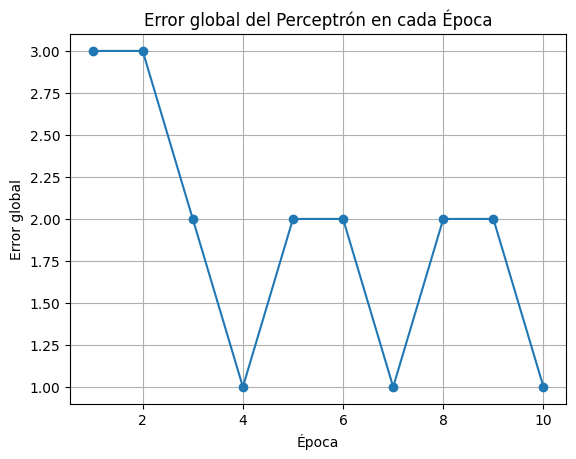

In [241]:
# Graficar el error global en cada época
plt.figure(1)
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Época')
plt.ylabel('Error global')
plt.title('Error global del Perceptrón en cada Época')
plt.grid(True)

In [242]:
# Probar el perceptrón con los datos de entrada
for xi in X:
    prediction = perceptron_predict(xi, weights)
    print(f"Entrada: {xi}, Predicción: {prediction}")


Entrada: [0 0], Predicción: 0
Entrada: [0 1], Predicción: 0
Entrada: [1 0], Predicción: 0
Entrada: [1 1], Predicción: 1


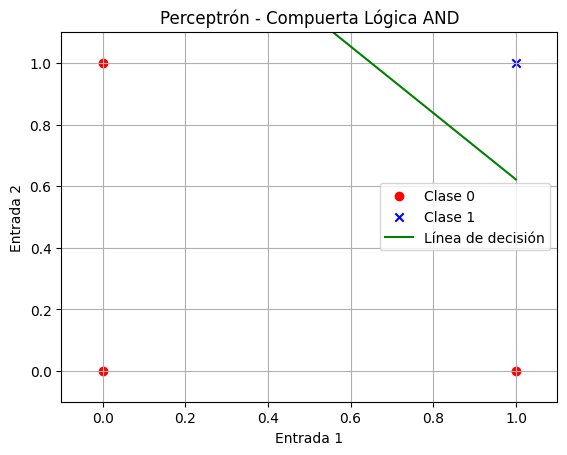

In [243]:
plt.figure(2)
# Graficar los puntos de datos
for i, xi in enumerate(X):
    if y[i] == 0:
        plt.scatter(xi[0], xi[1], color='red', marker='o', label='Clase 0' if i == 0 else "")
    else:
        plt.scatter(xi[0], xi[1], color='blue', marker='x', label='Clase 1' if i == 3 else "")

# Definir la línea de decisión
x_values = np.array([0, 1])
y_values = -(weights[1] * x_values + weights[0]) / weights[2]



# Graficar la línea de decisión

plt.plot(x_values, y_values, label='Línea de decisión', color='green')

# Configuraciones de la gráfica
plt.xlabel('Entrada 1')
plt.ylabel('Entrada 2')
plt.legend()
plt.title('Perceptrón - Compuerta Lógica AND')
plt.grid(True)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

# Mostrar la gráfica
plt.show()